In [3]:
from IPython.display import display
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings

warnings.simplefilter("ignore") # warning 무시하기
%matplotlib inline

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [7]:
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)[:6]))

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [8]:
print("임계치와 결정 함수 결과 비교:\n{}".format(
      gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [10]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(X_test))))

pred 는 예측 결과와 같다: True


In [11]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


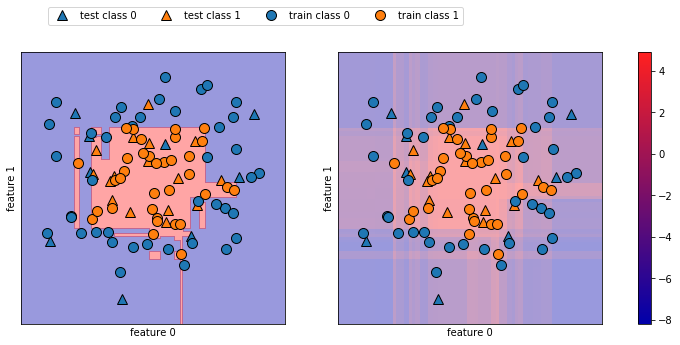

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0",
                "train class 1"], ncol=4, loc=(.1, 1.1))

In [14]:
print("Predicted probabilities:\n{}".format(
      gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


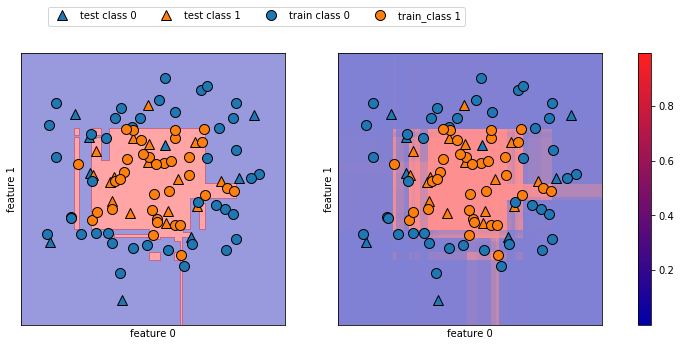

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0",
                "train_class 1"], ncol=4, loc=(.1, 1.1))

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [19]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(
      np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [20]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
합: [1. 1. 1. 1. 1. 1.]


In [21]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(
      np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classses_에 연결: {}".format(logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
